## Data Set Description

1. Name/Title: Speed Dating Experiment
2. Link to Data: https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment?resource=download
3. Source / Origin: 
	* Author or Creator: Anna Montoya
	* Publisher: kaggle
	* Version or Data Accessed: 1
4. License: Unknown

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
df = pd.read_csv('Speed Dating Data.csv', encoding ='ISO-8859-1')
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Exploring The Data

In [3]:
dates_num = len(df.index)
print("Number of speed dates gone on: " + str(dates_num))

Number of speed dates gone on: 8378


In [4]:
participants = df['iid'].nunique()
print("Number of participants: " + str(participants))

Number of participants: 551


## Gender Breakdown

In [5]:
unique_participants = df.groupby('iid').head(1)

In [6]:
women = unique_participants['gender'].value_counts()[0]
men = unique_participants['gender'].value_counts()[1]
print("Number of women: " + str(women))
print("Number of men: " + str(men))

Number of women: 274
Number of men: 277


There is an about even split of men and women participants.

## Race Breakdown

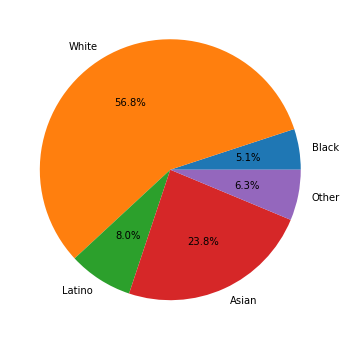

In [7]:
black = df['race'].value_counts()[1]
white = df['race'].value_counts()[2]
latino = df['race'].value_counts()[3]
asian = df['race'].value_counts()[4]
other = df['race'].value_counts()[6]
races = np.array([black, white, latino, asian, other])
race_labels = 'Black', 'White', 'Latino', 'Asian', 'Other'
plt.figure(figsize=(6, 6))
plt.pie(races, labels = race_labels, autopct='%1.1f%%')
plt.show() 

The majority of participants are white (with over half of them being so) with other minority races being much less represented.

## Fields and Careers

### Top 5 Fields Participants Are In

In [8]:
fields = {
  1: "Law",
  2: "Math",
  3: "Social Science, Psychologist",
  4: "Medical Science, Pharmaceuticals, and Bio Tech",
  5: "Engineering",
  6: "English/Creative Writing/ Journalism",
  7: "History/Religion/Philosophy",
  8: "Business/Econ/Finance",
  9: "Education, Academia",
  10: "Biological Sciences/Chemistry/Physics",
  11: "Social Work",
  12: "Undergrad/undecided",
  13: "Political Science/International Affairs",
  14: "Film",
  15: "Fine Arts/Arts Administration",
  16: "Languages",
  17: "Architecture",
  18: "Other"
}
top_5_fields = df['field_cd'].value_counts().nlargest(5).index.tolist()
i = 1
for code in top_5_fields:
    print(str(i) + ". " + fields[code])
    i += 1

1. Business/Econ/Finance
2. Biological Sciences/Chemistry/Physics
3. Engineering
4. Political Science/International Affairs
5. Social Science, Psychologist


### Top 5 Careers Participants Want To Go Into

In [9]:
careers = {
  1: "Lawyer",
  2: "Academic/Research",
  3: "Psychologist",
  4: "Doctor/Medicine",
  5: "Engineer",
  6: "Creative Arts/Entertainment",
  7: "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin",
  8: "Real Estate",
  9: "International/Humanitarian Affairs",
  10: "Undecided",
  11: "Social Work",
  12: "Speech Pathology",
  13: "Politics",
  14: "Pro sports/Athletics",
  15: "Other",
  16: "Journalism",
  17: "Architecture",
}
top_5_careers = df['career_c'].value_counts().nlargest(5).index.tolist()
i = 1
for code in top_5_careers:
    print(str(i) + ". " + careers[code])
    i += 1

1. Academic/Research
2. Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin
3. Creative Arts/Entertainment
4. Lawyer
5. International/Humanitarian Affairs


## Dating/Going Out Frequency

### Dating Frequency of Participants

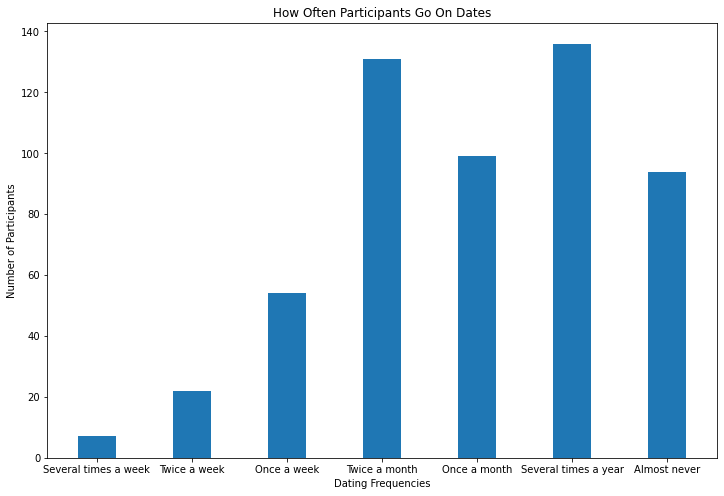

In [10]:
dates = unique_participants['date'].value_counts();
date_frequencies = {
  "Several times a week": dates[1],
  "Twice a week": dates[2],
  "Once a week": dates[3],
  "Twice a month": dates[4],
  "Once a month": dates[5],
  "Several times a year": dates[6],
  "Almost never": dates[7]
}
labels = list(date_frequencies.keys())
values = list(date_frequencies.values())
  
fig = plt.figure(figsize = (12, 8))
 
plt.bar(labels, values, width = 0.4)
 
plt.xlabel("Dating Frequencies")
plt.ylabel("Number of Participants")
plt.title("How Often Participants Go On Dates")
plt.show()

Overall, the participants date at a rather below average frequency with more than half the participants only going on a date at most once a month.

### Going Out Frequency of Participants

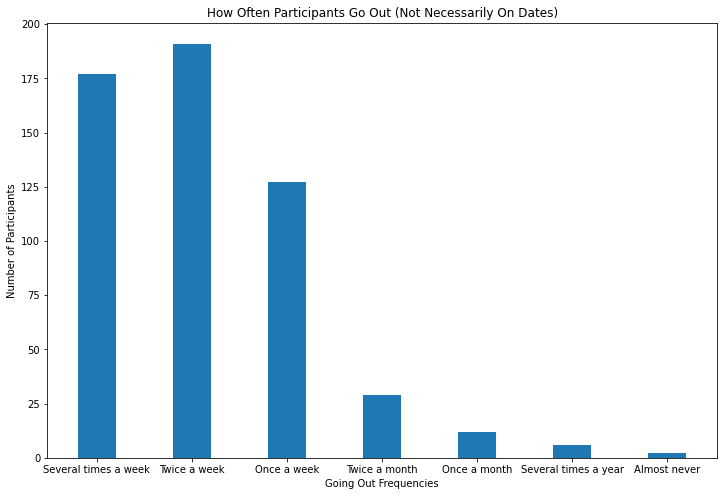

In [11]:
go_outs = unique_participants['go_out'].value_counts();
go_out_frequencies = {
  "Several times a week": go_outs[1],
  "Twice a week": go_outs[2],
  "Once a week": go_outs[3],
  "Twice a month": go_outs[4],
  "Once a month": go_outs[5],
  "Several times a year": go_outs[6],
  "Almost never": go_outs[7]
}
labels = list(go_out_frequencies.keys())
values = list(go_out_frequencies.values())
  
fig = plt.figure(figsize = (12, 8))
 
plt.bar(labels, values, width = 0.4)
 
plt.xlabel("Going Out Frequencies")
plt.ylabel("Number of Participants")
plt.title("How Often Participants Go Out (Not Necessarily On Dates)")
plt.show()

Overall, the participants go out very often with the vast majority of participants going out at least once a week.

## Age Distribution of Participants

/var/folders/30/cmv9c_5j3mq_kthx63sb1t5c0000gn/T/ipykernel_97976/4207629201.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age = unique_participants[np.isfinite(df['age'])]['age']


Text(0, 0.5, 'Frequency')

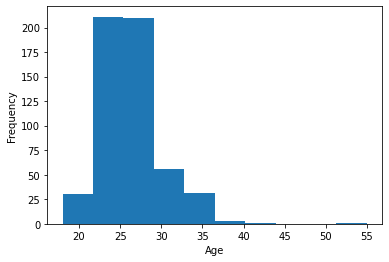

In [12]:
age = unique_participants[np.isfinite(df['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [13]:
mean_age = df['age'].mean()
print("Mean Age: " + str(mean_age))

Mean Age: 26.358927924664975


The majority of participants are in their 20s to early 30s. The mean age is 26.36 years old

## Percentage Of Dates That Resulted In Matches

In [14]:
df['match'].value_counts()
percent_matched = df['match'].value_counts()[1]/len(df.index)
print(str(percent_matched*100) + "% of dates resulted in a match")

16.47171162568632% of dates resulted in a match


## Percentage Of Participants That Got At Least One Match

In [15]:
# first number is matches, second number is dates, third number is expected matches
match_success = {1:[0, df['round'][0], df['match_es'][0]]}

for i in df.index:
    iid = df['iid'][i]
    if iid not in match_success:
        match_success[iid] = [0, df['round'][i], df['match_es'][i]]
    if df['match'][i] == 1:
        match_success[iid][0] += 1

In [16]:
got_a_match = 0
for iid in match_success:
    if match_success[iid][0] > 0:
        got_a_match += 1
print(str(got_a_match/participants*100) + "% of participants got at least one match")

82.03266787658802% of participants got at least one match


## Average Match Rate

In [17]:
match_success_pct = np.empty([551])
i = 0
for iid in match_success:
    match_success_pct[i] = match_success[iid][0]/match_success[iid][1]
    i += 1
mean_match = match_success_pct.mean()
print("The average participant had a match rate of " + str(mean_match*100) + "%")

The average participant had a match rate of 16.85316709113156%


# Cleaning The Data

## Checking For Null Values

In [18]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

## Removing All Columns Where Null Values Encompass 15% or More Of It and Other Unecessary Info

In [19]:
perc = 15.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df_less_nulls = df.dropna(axis=1, thresh=min_count)
df_less_nulls_rest = df_less_nulls.iloc[:, 10:]
df = pd.concat([df_less_nulls.iloc[:, 0], df_less_nulls.iloc[:, 2], df_less_nulls.iloc[:, 6], 
                df_less_nulls.iloc[:, 8], df_less_nulls_rest], axis=1)

In [20]:
df.isnull().sum()

iid            0
gender         0
round          0
order          0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
attr1_1       79
sinc1_1       

## Removing Columns That Don't Contain Numerical Data

In [21]:
df.dtypes

iid           int64
gender        int64
round         int64
order         int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64


In [22]:
df = df.drop(['field', 'from', 'career'], axis=1)

In [23]:
df.head(5)

,iid,gender,round,order,pid,match,int_corr,samerace,age_o,race_o,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,0,10,4,11.0,0,0.14,0,27.0,2.0,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,0,10,3,12.0,0,0.54,0,22.0,2.0,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,0,10,10,13.0,1,0.16,1,22.0,4.0,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,0,10,5,14.0,1,0.61,0,23.0,2.0,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,0,10,7,15.0,1,0.21,0,24.0,3.0,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


# Differences Between Men and Women

## What do men look for in a partner vs. what women look for in a partner?

In [24]:
diff_att = pd.concat([df.iloc[:, 1], df.loc[:,'attr1_1':'shar1_1']], axis=1)

<AxesSubplot:title={'center':'Correlation of Gender and Attributes They Look For Heatmap'}>

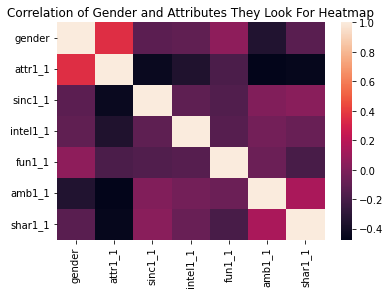

In [25]:
diff_att_heatmap = plt.axes()
diff_att_heatmap.set_title("Correlation of Gender and Attributes They Look For Heatmap")
corr_diff_att = diff_att.corr()
sns.heatmap(corr_diff_att, xticklabels=corr_diff_att.columns.values, yticklabels=corr_diff_att.columns.values)

Based on this correlation heatmap, it shows that men overall look for partners who are more attractive while women overall look for partners who are more ambitious.

In [26]:
women = df[df['gender'] == 0]
men = df[df['gender'] == 1]

In [27]:
sm.stats.ttest_ind(women['attr1_1'].dropna(), men['attr1_1'].dropna())

(-34.27786971461748, 5.975260304530677e-241, 8297.0)

I ran an independent t-test on a set of values containing how much just women look for attractiveness in partners and a set of values containing how much just men look for attractiveness in partners and got a t-value of -34.27786971461746 and a p-value of 5.975260304534076e-241. As the very large magnitude of this t-value indicates that these two groups are very different, the negative sign of this t-value indicates that the second group inputted (which I put as men) has a higher mean than the first, and this very low p-value (much lower than 5% or even 1%) indicates that it’s a very low probability that this t-value occurred by chance, we can reject the null hypothesis that there is no difference in the way women and men value attractiveness in a partner. In other words, it confirms the previous conclusion I drew, that men truly do look for partners who are more attractive.

In [28]:
sm.stats.ttest_ind(women['amb1_1'].dropna(), men['amb1_1'].dropna())

(33.876785648307774, 1.0543001624439997e-235, 8277.0)

I ran an independent t-test on a set of values containing how much just women look for ambition in partners and a set of values containing how much just men look for ambition in partners and got a t-value of 33.87678564830779 and a p-value of 1.0543001624436398e-235. As the very large magnitude of this t-value indicates that these two groups are very different, the positive sign of this t-value indicates that the first group inputted (which I put as women) has a higher mean than the first, and this very low p-value (much lower than 5% or even 1%) indicates that it’s a very low probability that this t-value occurred by chance, we can reject the null hypothesis that there is no difference in the way women and men value ambition in a partner. In other words, it confirms the previous conclusion I drew, that women truly do look for partners who are more ambitious.

## What do men THINK women look for in a partner vs. what women THINK men look for in a partner?

In [29]:
diff_att_opp = pd.concat([df.iloc[:, 1], df.loc[:,'attr2_1':'shar2_1']], axis=1)

<AxesSubplot:title={'center':'Correlation of Gender and Attributes They Think The Opposite Sex Looks For Heatmap'}>

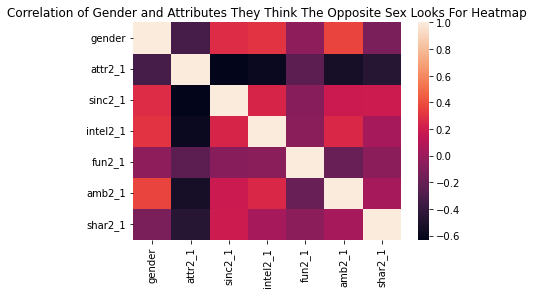

In [30]:
diff_att_opp_heatmap = plt.axes()
diff_att_opp_heatmap.set_title("Correlation of Gender and Attributes They Think The Opposite Sex Looks For Heatmap")
corr_diff_att_opp = diff_att_opp.corr()
sns.heatmap(corr_diff_att_opp, xticklabels=corr_diff_att_opp.columns.values, 
            yticklabels=corr_diff_att_opp.columns.values)

Based on this correlation heatmap, it shows that men overall think that women look for partners who are ambitious while women overall think that men look for partners who are attractive. This shows that participants overall have a good indiciation of what the opposite gender looks for as this matches what, based on this dataset, participants actually look for in a partner.

In [31]:
diff_att_self = pd.concat([df.iloc[:, 1], df.loc[:,'attr3_1':'amb3_1']], axis=1)

<AxesSubplot:title={'center':'Correlation of Gender and Self Attributes Heatmap'}>

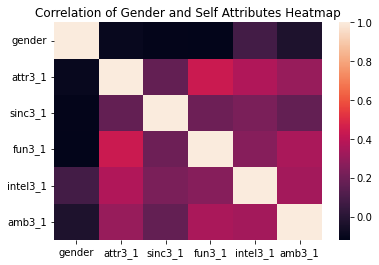

In [32]:
diff_att_self_heatmap = plt.axes()
diff_att_self_heatmap.set_title("Correlation of Gender and Self Attributes Heatmap")
corr_diff_att_self = diff_att_self.corr()
sns.heatmap(corr_diff_att_self, xticklabels=corr_diff_att_self.columns.values, 
            yticklabels=corr_diff_att_self.columns.values)

Based on this correlation heatmap, there is generally no difference in how men and women perceive themselves in accordance to these attributes.

## What activities do men like vs. what women like?

In [33]:
diff_act = pd.concat([df.iloc[:, 1], df.loc[:,'sports':'yoga']], axis=1)

<AxesSubplot:title={'center':'Correlation of Gender and Activites Heatmap'}>

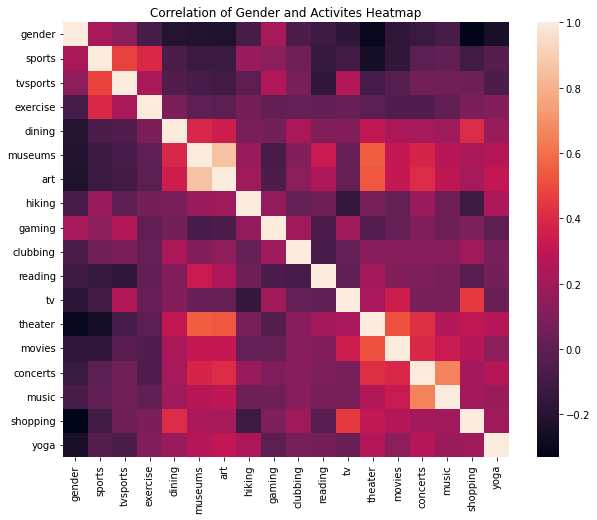

In [34]:
plt.figure(figsize=(10, 8))
diff_act_heatmap = plt.axes()
diff_act_heatmap.set_title("Correlation of Gender and Activites Heatmap")
corr_diff_act = diff_act.corr()
sns.heatmap(corr_diff_act, xticklabels=corr_diff_act.columns.values, yticklabels=corr_diff_act.columns.values)

Based on this correlation heatmap, it shows that men overall enjoy sports and gaming while women overall enjoy theater and shopping.

## How often do men go out on dates vs. women?

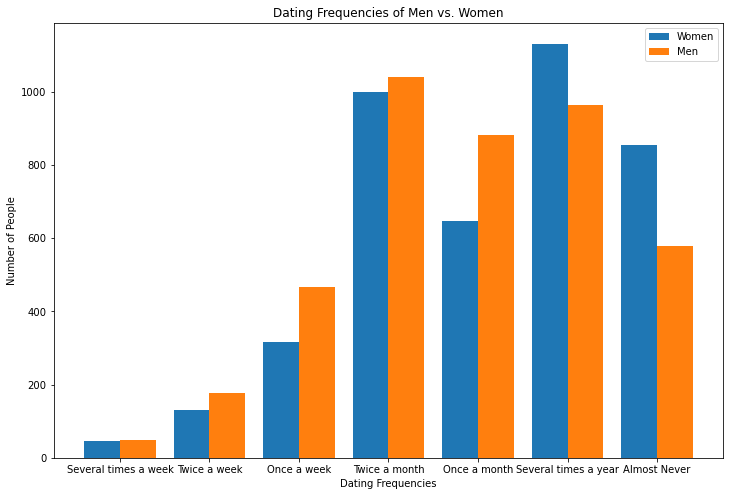

In [35]:
labels = ["Several times a week", "Twice a week", "Once a week", "Twice a month", "Once a month", 
          "Several times a year", "Almost Never"]

women = df[df['gender'] == 0]
men = df[df['gender'] == 1]

women_dates = women['date'].value_counts()
men_dates = men['date'].value_counts()

women_dates = [women_dates[1], women_dates[2], women_dates[3], women_dates[4], women_dates[5], women_dates[6], 
               women_dates[7]]
men_dates = [men_dates[1], men_dates[2], men_dates[3], men_dates[4], men_dates[5], men_dates[6], men_dates[7]]
  
axis = np.arange(len(labels))

plt.figure(figsize=(12, 8))
  
plt.bar(axis - 0.2, women_dates, 0.4, label = 'Women')
plt.bar(axis + 0.2, men_dates, 0.4, label = 'Men')
  
plt.xticks(axis, labels)
plt.xlabel("Dating Frequencies")
plt.ylabel("Number of People")
plt.title("Dating Frequencies of Men vs. Women")
plt.legend()
plt.show()

This double bar graph shows that overall, men date more frequently than women.

In [36]:
sm.stats.ttest_ind(women['date'].dropna(), men['date'].dropna())

(9.237997174364597, 3.140623634387764e-20, 8279.0)

I ran an independent t-test on a set of values containing how often women go on dates and a set of values containing how often men go on dates and got a t-value of 9.237997174364601 and a p-value of 3.1406236343876524e-20. As the relatively large magnitude of this t-value indicates that these two groups are very different, the positive sign of this t-value indicates that the first group inputted (which I put as women) has a higher mean than the first, and this very low p-value (much lower than 5% or even 1%) indicates that it’s a very low probability that this t-value occurred by chance, we can reject the null hypothesis that there is no difference in the frequency women and men go on dates. In other words, it confirms the previous conclusion I drew, that men go on more dates than women

# The Experiment

## Race

### How many participants find at least some importance in being the same race as the person they're dating?

In [37]:
same_race_importance = len(unique_participants[unique_participants['imprace'] > 5])/551
print(str(same_race_importance*100) + "% of participants find at least some importance in being the same race as the person they're dating")

27.76769509981851% of participants find at least some importance in being the same race as the person they're dating


I defined participants finding at least some importance in being the same race as the person they're dating as them answering the question "How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?" on the form with a 6 or higher. Through this definition, I found that 27.76769509981851% of participants find at least some importance in being the same race as the person they're dating.

### Does being of the same race increase your likelihood of matching?

In [38]:
diff_race = df[df['samerace'] == 0]
same_race = df[df['samerace'] == 1]
diff_race_avg = diff_race['match'].mean()
print("Likelihood of matching if partners are of different race: " + str(diff_race_avg*100) + "%")
same_race_avg = same_race['match'].mean()
print("Likelihood of matching if partners are of the same race: " + str(same_race_avg*100) + "%")

Likelihood of matching if partners are of different race: 16.08060055314105%
Likelihood of matching if partners are of the same race: 17.06875753920386%


In [39]:
sm.stats.ttest_ind(diff_race['match'].dropna(), same_race['match'].dropna())

(-1.1924027153572123, 0.23313715534147136, 8376.0)

I first found that the likelihood of partners matching if they're of different or the same race to not be too different from each other (with the former being just above 16% and the latter being just above 17%). This indicates that whether or not partners are of the same race does not affect whether or not they match. To further confirm this conclusion, I ran an independent t-test on the match values for dates that were of different races and on the match values for dates that were of the same race and got an absolute t-value of 1.1924027153572123 and a p-value of 0.23313715534147136. As this small t-value indicates that the two groups are generally similar and this p-value that is greater than 5% indicates that it's probable that this t-value occured by chance, we cannot reject the null hypothesis that partners of the same race aren't more likely to match than partners of different races. In other words, whether or partners dates are of the same race doesn't affect whether or not they match.

While more than a quarter of the participants at least slightly care about them being the same race as the person they're dating, I found that partners of the same race are not any more likely to match than partners of different races.

## Age

### Does age affect a participants' match rate?

In [45]:
age_nonull = df[df['age'].notna()]

In [46]:
match_success_1 = {1:[0, age_nonull['round'][0], age_nonull['age'][0]]}

for i in age_nonull.index:
    iid = age_nonull['iid'][i]
    if iid not in match_success_1:
        match_success_1[iid] = [0, age_nonull['round'][i], age_nonull['age'][i]]
    if age_nonull['match'][i] == 1:
        match_success_1[iid][0] += 1

In [47]:
match_success_pct_1 = []
age = []
for iid in match_success_1:
    match_success_pct_1.append(match_success_1[iid][0]/match_success_1[iid][1])
    age.append(match_success_1[iid][2])

<AxesSubplot:title={'center':'Age vs Match Success'}, xlabel='Age', ylabel='Match Success'>

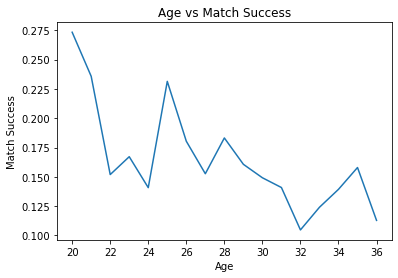

In [49]:
age_match_success = pd.DataFrame({'age': age, 'match_success': match_success_pct_1})
age_match_success_counts = age_match_success['age'].value_counts()
age_match_success = age_match_success[age_match_success['age'].isin(age_match_success_counts.index[age_match_success_counts.gt(2)])]
age_match_success.groupby(['age'])['match_success'].mean().plot.line(title = "Age vs Match Success", xlabel = "Age", 
                                                                     ylabel = "Match Success")

Generally younger participants (20 and 21 year olds) had higher match rate than older participants (with the exception of 25 year old participants also having a generally higher match rate than other participants). This may be due to both younger people likely having less dating experience (and in that potentially being less selective on who they ask on a second date) and participants overall liking those who are younger (possibly because they look and act more youthful).

## Expectations and Predictions

### Does coming in with positive expectations affect participants' ability to get a match?

In [59]:
def lin_reg(x, y):
    '''
    ordinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

In [60]:
exphappy_nonull = df[df['exphappy'].notna()]

In [61]:
match_success_2 = {1:[0, exphappy_nonull['round'][0], exphappy_nonull['exphappy'][0]]}

for i in exphappy_nonull.index:
    iid = exphappy_nonull['iid'][i]
    if iid not in match_success_2:
        match_success_2[iid] = [0, exphappy_nonull['round'][i], exphappy_nonull['exphappy'][i]]
    if exphappy_nonull['match'][i] == 1:
        match_success_2[iid][0] += 1

In [62]:
match_success_pct_2 = np.empty([551])
exphappy = np.empty((551))
i = 0
for iid in match_success_2:
    match_success_pct_2[i] = match_success_2[iid][0]/match_success_2[iid][1]
    exphappy[i] = match_success_2[iid][2]
    i += 1

In [63]:
print("exphappy: " + str(lin_reg(exphappy, match_success_pct_2)[0][1]))

exphappy: 0.010564853821624528


Coming in with positive expectations (which I defined as a participant expecting to be happier with the people they meet during the event) slightly improves a participant's ability to get a match. This may be because people who come in with more positive expectations are both more likely to ask for more second dates, but also exude a positive energy which could potentially make them more likely to be asked on more second dates.

### Can participants accurately predict their own perceived value in the dating market?

In [64]:
accurate_predictions = 0
for iid in match_success:
    p = match_success[iid]
    if p[1] <= 10:
        if p[0]-1 <= p[2] <= p[0]+1:
            accurate_predictions += 1
    else:
        if p[0]-2 <= p[2] <= p[0]+2:
            accurate_predictions += 1
print(str(accurate_predictions/participants*100) 
      + "% of participants can generally predict how many matches they're going to get.")

60.798548094373864% of participants can generally predict how many matches they're going to get.


I defined a participant being able to accurately predict their own perceived value in the dating market as if they can generally predict how many matches they're going to get. If a participant went on 10 or less dates, I defined an "accurate prediction" as the number of matches they expect being either equal to, one less, or one more than the number of matches they actually got. If a participant went on more than 10 dates, I defined "accurate prediction" as the number of matches they expect being equal to, within two less, or within two more than the number of matches they actually got. Based on this, a little under 61% of participants can accurately predict their own perceived value in the dating market?

## Attributes and Likeability

### Which attributes are best predictors for getting someone to decide to want to go on a second date with you?

In [78]:
atts_dec = df[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'dec']].dropna().sample(frac=1)
train1 = atts_dec.iloc[:5280]
test1 = atts_dec.iloc[5280:]

In [79]:
atts_train = np.array([train1['attr'], train1['sinc'], train1['intel'], train1['fun'], train1['amb'], 
                       train1['shar']]).T
dec_train = train1['dec']
lin_reg_train_1 = lin_reg(atts_train, dec_train)
betas1 = lin_reg_train_1[0]
print("Betas")
print("Attractiveness: " + str(betas1[1]))
print("Sincerity: " + str(betas1[2]))
print("Intelligence: " + str(betas1[3]))
print("Fun: " + str(betas1[4]))
print("Ambition: " + str(betas1[5]))
print("Shared Interests: " + str(betas1[6]))

Betas
Attractiveness: 0.08874798522653374
Sincerity: -0.01790753084145394
Intelligence: 0.009360057216747783
Fun: 0.040444835317540256
Ambition: -0.025874115021422603
Shared Interests: 0.044180256328641955


In [75]:
print("R^2: " + str(lin_reg_train_1[2]))

R^2: 0.2866560731470025


In [76]:
atts_test = np.array([test1['attr'], test1['sinc'], test1['intel'], test1['fun'], test1['amb'], test1['shar']]).T
dec_test_1 = test1['dec']

In [77]:
yHat1 = betas1[0] + betas1[1]*atts_train[:,0] + betas1[2]*atts_train[:,1] + betas1[3]*atts_train[:,2] + betas1[4]*atts_train[:,3] + betas1[5]*atts_train[:,4] + betas1[6]*atts_train[:,5]
yHat2 = betas1[0] + betas1[1]*atts_test[:,0] + betas1[2]*atts_test[:,1] + betas1[3]*atts_test[:,2] + betas1[4]*atts_test[:,3] + betas1[5]*atts_test[:,4] + betas1[6]*atts_test[:,5]
rmse = np.sqrt(np.mean((yHat2 - dec_test_1)**2))
print("RMSE: " + str(rmse))

RMSE: 0.4205967261794824


The first way I thought about answering this question is through seeing how each participant rates each partner on the six attributes (attractiveness, sincerity, intelligence, fun, ambition, and shared interests) affects whether or not they want to go on a second date with them. I created a training set with the first 75% of the data, training a linear regression model with the six attributes as predictors for the decision. From this model, I got the betas listed above. These betas show that whether or not a participant is attracted to their partner is the best predictor on whether or not they'll ask for a second date or not. Other attributes that have a slight positive impact on whether or not a participant asks for a second date are if there are shared interests, they find their date fun, and if they find their date to be intelligent. Attributes that negatively affect if a participant wants to go on a second date are if they find their date ambitious and sincere.

In regards to accuracy, I calculated an R^2 value of 0.28 which means that the model represents a relatively weak to moderate proportion of the variance. I cross-validated my model as well with a test est that I created from 25% of the data, calculating the RMSE to be 0.42. This means that the model is relatively okay at predicting the data.

In [ ]:
atts_o_dec = df[['iid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'dec_o']].dropna()

dec_success = {1:[0, 0, 0, 0, 0, 0, 0, 0]}

for i in atts_o_dec.index:
    iid = atts_o_dec['iid'][i]
    if iid not in dec_success:
        dec_success[iid] = [0, 0, 0, 0, 0, 0, 0, 0]
    dec_success[iid][0] += atts_o_dec['attr_o'][i]
    dec_success[iid][1] += atts_o_dec['sinc_o'][i]
    dec_success[iid][2] += atts_o_dec['intel_o'][i]
    dec_success[iid][3] += atts_o_dec['fun_o'][i]
    dec_success[iid][4] += atts_o_dec['amb_o'][i]
    dec_success[iid][5] += atts_o_dec['shar_o'][i]
    dec_success[iid][7] += 1
    if atts_o_dec['dec_o'][i] == 1:
        dec_success[iid][6] += 1

In [ ]:
for iid in dec_success:
    dec_success[iid] = [x/dec_success[iid][7] for x in dec_success[iid]]
    dec_success[iid].pop()

In [ ]:
atts_dec_pct = np.array(list(dec_success.values()))
train2 = atts_dec_pct[:413].T
atts_o_train = train2[:6].T
dec_train_2 = train2[6:].T
lin_reg_train_2 = lin_reg(atts_o_train, dec_train_2)
betas2 = lin_reg_train_2[0]
print("Betas")
print("Attractiveness: " + str(betas2[1]))
print("Sincerity: " + str(betas2[2]))
print("Intelligence: " + str(betas2[3]))
print("Fun: " + str(betas2[4]))
print("Ambition: " + str(betas2[5]))
print("Shared Interests: " + str(betas2[6]))

In [ ]:
print("R^2: " + str(lin_reg_train_2[2]))

In [ ]:
test2 = atts_dec_pct[413:].T
atts_o_test = train2[:6].T
dec_test_2 = train2[6:].T

In [ ]:
yHat1 = betas2[0] + betas2[1]*atts_o_train[:,0] + betas2[2]*atts_o_train[:,1] + betas2[3]*atts_o_train[:,2] + betas2[4]*atts_o_train[:,3] + betas2[5]*atts_o_train[:,4] + betas2[6]*atts_o_train[:,5]
yHat2 = betas2[0] + betas2[1]*atts_o_test[:,0] + betas2[2]*atts_o_test[:,1] + betas2[3]*atts_o_test[:,2] + betas2[4]*atts_o_test[:,3] + betas2[5]*atts_o_test[:,4] + betas2[6]*atts_o_test[:,5]
rmse = np.sqrt(np.mean((yHat2 - dec_test_2)**2))
print("RMSE: " + str(rmse))

Another way I thought about answering this question is through calculating how each participant measured up on average in regards to the six attributes (based on how each of their partners rated them) and seeing how those rating averages affect their date success rate (which I defined as the number of dates that ask for a second date with them divided by the total number of dates they went on). I created a training set with the first 75% of the data, training a linear regression model with the calculated average ratings of the six attributes as predictors for the decision of their partner. From this model, I got the betas listed above. These betas show that the attribute that has the most impact on participants' date success rates is their attractiveness (as in, the more attractive a participant is, the more likely they are to be asked on a second date). Other attributes that lead to participants' having a higher date success rate are if they are fun, intelligent, and have shared interests with their date. Attributes that lead to participants' having a lower date sucecss rate are if they are ambitious and sincere.

In regards to accuracy, I calculated an R^2 value of 0.0.6557096999081848 which means that the model represents a relatively moderate to substantial proportion of the variance. I cross-validated my model as well with a test est that I created from 25% of the data, calculating the RMSE to be 0.323140154830922. This means that the model is relatively okay at predicting the data.

This experiment showed that the while being fun, intelligent, and having shared interests with a partner helps a person land a second date, the most important attribute is ultimately attractiveness. This is especially true in that based on the correlation matrix of gender and attributes looked for in a partner I showed earlier, it was shown that men really do look for attractiveness in a partner above all else.

While this may be, however, as these dates are short (only 4 minutes each), it's quite difficult to judge a person on their personality in such a little amount of time. As a person's appearance is external and more easily to quickly judge, this may contribute to why attractiveness was found to be the most important attribute in landing a second date (rather than participants' really valuing it as an attribute above all else overall).

### How much does a participant need to like their partner to want to go on a second date with them?

In [ ]:
like_dec_df = pd.concat([df['like'], df['dec']], axis=1).dropna().sample(frac=1)
like_dec_df_train = like_dec_df[:6104]
like_dec_df_test = like_dec_df[6104:]
like_dec_train = np.array([like_dec_df_train['like'], like_dec_df_train['dec']]).T
x_train = like_dec_train[:,0].reshape(len(like_dec_train),1) 
y_train = like_dec_train[:,1]
like_dec_test = np.array([like_dec_df_test['like'], like_dec_df_test['dec']]).T
x_test = like_dec_test[:,0].reshape(len(like_dec_test),1) 
y_test = like_dec_test[:,1]
model = LogisticRegression().fit(x_train,y_train)
predict_train_model = model.predict(x_train)
predict_test_model = model.predict(x_test)

In [ ]:
x1 = np.linspace(0,10,500)
y1 = x1 * model.coef_ + model.intercept_
sigmoid = expit(y1)
plt.plot(x1,sigmoid.ravel(),color='red',linewidth=3) # the ravel function returns a flattened array
plt.scatter(like_dec_train[:,0],like_dec_train[:,1],color='black')
plt.hlines(0.5,0,10,colors='gray',linestyles='dotted')
plt.xlabel('Likeness Score')
plt.xlim([0,10])
plt.ylabel('Decision')
plt.yticks(np.array([0,1]))
plt.show()

In [ ]:
print("Probability Of Wanting To Go On A Second Date Based On Different Likeness Scores")
for i in range(11):
    probDecision = sigmoid[0,np.abs(x1-i).argmin()]
    print(str(i) + ": " + str(probDecision.round(3)))

In [ ]:
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_model))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_model))

I ran a logistic regression with participants' ratings of how much they liked their date as a predictor for whether or not they chose to go on a second date with them. Through this, I found that a participant must generally rate their date a "7/10" for how much they like them to be likely to ask them out on a second date. I created this model from a training set with 75% of the original dataset and tested it with a test set with the remaining 25% of the original datset, calculating a validation accuracy of between 0.7 and 0.75. This shows that this model does a relatively good job of predicting the data.

## Date Order

### Does date order have an impact on whether or not a participant asks for a second date?

In [ ]:
round_impact = df[['round', 'order', 'dec']]
round_impact['round_progress'] = round_impact['order']/round_impact['round']
only_yes = round_impact[round_impact['dec'] == 1]

In [ ]:
plt.hist(only_yes['round_progress'], ec = 'black')
plt.xlabel('Round Progress')
plt.ylabel('Number of Second Dates Asked For')
plt.show()

As participants went on varying numbers of dates, to standardize the data, I tracked how far along a participant was in their round of dates rather than which date number they were on. Through this, I found that participants are more likely to ask for a second date at the very beginning at very end of their rounds with the latter being when they participants' are overall most likely to ask for a second date.

This experiment showed that in speed dating, it's best to be someone's first few or last few dates of the night rather than in the middle. Regarding a higher rate of second dates being asked for in initial stages, this may be because participants come in excited about the novelty of the experience and have more energy at the beginning of the round, resulting in them asking for more second dates. Regarding lower rates of second dates being asked for in middle stages, this may be because participants are starting to feel drained and tired from meeting so many people, resulting in them not being as excited to meet and talk to more people which ultimately results in less second dates being asked for. Finally, regarding the highest rates of second dates being asked for in final stages, this may be because participants want to make the most of their last few dates since the round is ending and also make a final effort to increase their chances of having more matches, both of which would result in participants offering more second dates.